In [32]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ref = L96_XY()

In [5]:
ref.warmup()

In [27]:
ds = []
for ens in range(1500):
    ref.t=0
    ds.append(ref.run(128, 1, collect_coupling=True))
ds = xr.concat(ds, dim='ens')

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


In [28]:
ds.to_netcdf('datasets/online.nc')

In [74]:
def dataset_to_dataloader(_ds, batch_size=32, shuffle=False):
  X = torch.tensor(_ds['X'].values.astype('float32'))
  #https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader
  return DataLoader(TensorDataset(X), batch_size=batch_size, shuffle=shuffle)

In [75]:
train_loader=dataset_to_dataloader(xr.open_dataset('datasets/online.nc'), shuffle=True)
val_loader=dataset_to_dataloader(xr.open_dataset('datasets/online_val.nc'))
ds_test = xr.open_dataset('datasets/test.nc')

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


In [76]:
for x, in train_loader:
    print(x.shape)
    break

torch.Size([32, 128, 8])


In [33]:
ref = L96_XY()
coarse = L96_X()

In [77]:
%%time
online, pred = L96_X.train_online(train_loader, val_loader, ds_test, max_epochs=50)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (47) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:  70%|███████   | 40/57 [00:08<00:03,  4.46it/s, loss=1.53, v_num=2.6e+7, train_loss=1.250]
Validation: 0it [00:00, ?it/s]
Epoch 1:  70%|███████   | 40/57 [00:08<00:03,  4.49it/s, loss=0.682, v_num=2.6e+7, train_loss=0.724, val_loss=0.822]
Validation: 0it [00:00, ?it/s]
Epoch 2:  70%|███████   | 40/57 [00:08<00:03,  4.50it/s, loss=0.486, v_num=2.6e+7, train_loss=0.545, val_loss=0.547]
Validation: 0it [00:00, ?it/s]
Epoch 3:  70%|███████   | 40/57 [00:08<00:03,  4.50it/s, loss=0.424, v_num=2.6e+7, train_loss=0.419, val_loss=0.598]
Validation: 0it [00:00, ?it/s]
Epoch 4:  70%|███████   | 40/57 [00:08<00:03,  4.50it/s, loss=0.385, v_num=2.6e+7, train_loss=0.354, val_loss=0.358]
Validation: 0it [00:00, ?it/s]
Epoch 5:  70%|███████   | 40/57 [00:08<00:03,  4.51it/s, loss=0.328, v_num=2.6e+7, train_loss=0.281, val_loss=0.312]
Validation: 0it [00:00, ?it/s]
Epoch 6:  70%|███████   | 40/57 [00:08<00:03,  4.50it/s, loss=0.277, v_num=2.6e+7, train_loss=0.234, val_loss=0.271]
Validation: 

Epoch 21:  70%|███████   | 40/57 [00:08<00:03,  4.51it/s, loss=0.292, v_num=2.6e+7, train_loss=0.201, val_loss=0.225]
Validation: 0it [00:00, ?it/s]
Epoch 22:  70%|███████   | 40/57 [00:08<00:03,  4.51it/s, loss=0.204, v_num=2.6e+7, train_loss=0.228, val_loss=0.275]
Validation: 0it [00:00, ?it/s]
Epoch 23:  70%|███████   | 40/57 [00:08<00:03,  4.51it/s, loss=0.188, v_num=2.6e+7, train_loss=0.184, val_loss=0.207]
Validation: 0it [00:00, ?it/s]
Epoch 24:  70%|███████   | 40/57 [00:08<00:03,  4.51it/s, loss=0.22, v_num=2.6e+7, train_loss=0.160, val_loss=0.209] 
Validation: 0it [00:00, ?it/s]
Epoch 25:  70%|███████   | 40/57 [00:08<00:03,  4.52it/s, loss=0.219, v_num=2.6e+7, train_loss=0.265, val_loss=0.253]
Validation: 0it [00:00, ?it/s]
Epoch 26:  70%|███████   | 40/57 [00:09<00:03,  4.39it/s, loss=0.21, v_num=2.6e+7, train_loss=0.211, val_loss=0.245] 
Validation: 0it [00:00, ?it/s]
Epoch 27:  70%|███████   | 40/57 [00:08<00:03,  4.51it/s, loss=0.197, v_num=2.6e+7, train_loss=0.167, val_

Epoch 42:  70%|███████   | 40/57 [00:08<00:03,  4.50it/s, loss=0.153, v_num=2.6e+7, train_loss=0.172, val_loss=0.209]
Validation: 0it [00:00, ?it/s]
Epoch 43:  70%|███████   | 40/57 [00:08<00:03,  4.51it/s, loss=0.189, v_num=2.6e+7, train_loss=0.180, val_loss=0.218]
Validation: 0it [00:00, ?it/s]
Epoch 44:  70%|███████   | 40/57 [00:08<00:03,  4.50it/s, loss=0.261, v_num=2.6e+7, train_loss=0.179, val_loss=0.230]
Validation: 0it [00:00, ?it/s]
Epoch 45:  70%|███████   | 40/57 [00:08<00:03,  4.51it/s, loss=0.174, v_num=2.6e+7, train_loss=0.167, val_loss=0.293]
Validation: 0it [00:00, ?it/s]
Epoch 46:  70%|███████   | 40/57 [00:08<00:03,  4.50it/s, loss=0.15, v_num=2.6e+7, train_loss=0.177, val_loss=0.191] 
Validation: 0it [00:00, ?it/s]
Epoch 47:  70%|███████   | 40/57 [00:08<00:03,  4.52it/s, loss=0.159, v_num=2.6e+7, train_loss=0.155, val_loss=0.188]
Validation: 0it [00:00, ?it/s]
Epoch 48:  70%|███████   | 40/57 [00:08<00:03,  4.50it/s, loss=0.152, v_num=2.6e+7, train_loss=0.136, val_

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 57/57 [00:11<00:00,  5.12it/s, loss=0.159, v_num=2.6e+7, train_loss=0.221, val_loss=0.172]
CPU times: user 9min 16s, sys: 594 ms, total: 9min 16s
Wall time: 9min 18s


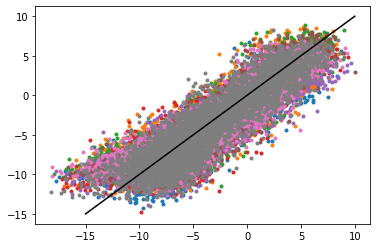

In [78]:
plt.plot(pred.Xcouple, pred.Xpred, '.')
plt.plot([-15, 10], [-15, 10], 'k')

In [60]:
ds_train = xr.open_dataset('datasets/train.nc')
ds_val = xr.open_dataset('datasets/val.nc')
ds_test = xr.open_dataset('datasets/test.nc')
def dataset_to_dataloader(_ds, batch_size=1024, shuffle=False):
  X = torch.tensor(_ds['X'].values.astype('float32'))
  Y = torch.tensor(_ds['Xcouple'].values.astype('float32'))
  #https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader
  return DataLoader(TensorDataset(X,Y), batch_size=batch_size, shuffle=shuffle)
train_loader=dataset_to_dataloader(ds_train, shuffle=True)
val_loader=dataset_to_dataloader(ds_train)

In [62]:
mse, pred = L96_X.from_dataset(train_loader, val_loader, ds_test)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory /home/pp2681/L96_predictability/lightning_logs/version_25954153/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (49) is smaller than the logging interval Trainer(log_every_n_steps=50

Epoch 0:  41%|████      | 40/98 [00:00<00:00, 61.11it/s, loss=8.48, v_num=2.6e+7, train_loss=5.910, train_MSE=5.910, train_S=-.0126, train_F=-.0602]
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 116.01it/s, loss=3.48, v_num=2.6e+7, train_loss=3.290, train_MSE=3.290, train_S=-.0126, train_F=-.013, val_loss=5.010, val_MSE=5.010, val_S=-.0125, val_F=-.0566] 
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 117.43it/s, loss=3, v_num=2.6e+7, train_loss=2.930, train_MSE=2.930, train_S=-.0117, train_F=-.00956, val_loss=3.170, val_MSE=3.170, val_S=-.0124, val_F=-.0126]  
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 69.97it/s, loss=2.83, v_num=2.6e+7, train_loss=2.810, train_MSE=2.810, train_S=-.011, train_F=-.00818, val_loss=2.940, val_MSE=2.940, val_S=-.0117, val_F=-.0109] 
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 117.34it/s, loss=2.73, v_num=2.6e+7, train_loss=2.690,

Epoch 9:  41%|████      | 40/98 [00:00<00:00, 116.62it/s, loss=2.49, v_num=2.6e+7, train_loss=2.500, train_MSE=2.500, train_S=-.00945, train_F=-.0109, val_loss=2.500, val_MSE=2.500, val_S=-.00942, val_F=-.00987] 
Validation: 0it [00:00, ?it/s]
Epoch 10:  41%|████      | 40/98 [00:00<00:00, 74.68it/s, loss=2.46, v_num=2.6e+7, train_loss=2.470, train_MSE=2.470, train_S=-.0093, train_F=-.00847, val_loss=2.450, val_MSE=2.450, val_S=-.0093, val_F=-.0096]  
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 117.97it/s, loss=2.43, v_num=2.6e+7, train_loss=2.510, train_MSE=2.510, train_S=-.00953, train_F=-.0117, val_loss=2.490, val_MSE=2.490, val_S=-.00926, val_F=-.00944]
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 75.90it/s, loss=2.45, v_num=2.6e+7, train_loss=2.480, train_MSE=2.480, train_S=-.00896, train_F=-.0103, val_loss=2.390, val_MSE=2.390, val_S=-.00887, val_F=-.00985] 
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      

Epoch 17:  41%|████      | 40/98 [00:00<00:00, 88.83it/s, loss=2.33, v_num=2.6e+7, train_loss=2.280, train_MSE=2.280, train_S=-.0082, train_F=-.0085, val_loss=2.310, val_MSE=2.310, val_S=-.00837, val_F=-.0103]  
Validation: 0it [00:00, ?it/s]
Epoch 18:  41%|████      | 40/98 [00:00<00:00, 67.28it/s, loss=2.32, v_num=2.6e+7, train_loss=2.310, train_MSE=2.310, train_S=-.00815, train_F=-.0102, val_loss=2.280, val_MSE=2.280, val_S=-.00803, val_F=-.0099]
Validation: 0it [00:00, ?it/s]
Epoch 19:  41%|████      | 40/98 [00:00<00:00, 59.44it/s, loss=2.3, v_num=2.6e+7, train_loss=2.290, train_MSE=2.290, train_S=-.00812, train_F=-.0092, val_loss=2.390, val_MSE=2.390, val_S=-.00856, val_F=-.00817]  
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 117.44it/s, loss=2.26, v_num=2.6e+7, train_loss=2.300, train_MSE=2.300, train_S=-.00835, train_F=-.0091, val_loss=2.280, val_MSE=2.280, val_S=-.00806, val_F=-.00967] 
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      |

Epoch 25:  41%|████      | 40/98 [00:00<00:00, 117.52it/s, loss=2.22, v_num=2.6e+7, train_loss=2.180, train_MSE=2.180, train_S=-.00768, train_F=-.00918, val_loss=2.240, val_MSE=2.240, val_S=-.00793, val_F=-.0102]
Validation: 0it [00:00, ?it/s]
Epoch 26:  41%|████      | 40/98 [00:00<00:00, 116.90it/s, loss=2.22, v_num=2.6e+7, train_loss=2.190, train_MSE=2.190, train_S=-.00744, train_F=-.011, val_loss=2.200, val_MSE=2.200, val_S=-.00761, val_F=-.00957]  
Validation: 0it [00:00, ?it/s]
Epoch 27:  41%|████      | 40/98 [00:00<00:00, 116.70it/s, loss=2.21, v_num=2.6e+7, train_loss=2.210, train_MSE=2.210, train_S=-.00788, train_F=-.00988, val_loss=2.210, val_MSE=2.210, val_S=-.00767, val_F=-.00987]
Validation: 0it [00:00, ?it/s]
Epoch 28:  41%|████      | 40/98 [00:00<00:00, 75.25it/s, loss=2.21, v_num=2.6e+7, train_loss=2.150, train_MSE=2.150, train_S=-.00745, train_F=-.0108, val_loss=2.240, val_MSE=2.240, val_S=-.00776, val_F=-.00988]  
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████  

Epoch 33:  41%|████      | 40/98 [00:00<00:00, 101.92it/s, loss=2.19, v_num=2.6e+7, train_loss=2.170, train_MSE=2.170, train_S=-.00718, train_F=-.00886, val_loss=2.150, val_MSE=2.150, val_S=-.00733, val_F=-.00925]
Validation: 0it [00:00, ?it/s]
Epoch 34:  41%|████      | 40/98 [00:00<00:00, 112.35it/s, loss=2.16, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_S=-.00726, train_F=-.00861, val_loss=2.180, val_MSE=2.180, val_S=-.00738, val_F=-.00957]
Validation: 0it [00:00, ?it/s]
Epoch 35:  41%|████      | 40/98 [00:00<00:00, 117.21it/s, loss=2.16, v_num=2.6e+7, train_loss=2.170, train_MSE=2.170, train_S=-.00727, train_F=-.0105, val_loss=2.140, val_MSE=2.140, val_S=-.00722, val_F=-.00949] 
Validation: 0it [00:00, ?it/s]
Epoch 36:  41%|████      | 40/98 [00:00<00:00, 99.17it/s, loss=2.15, v_num=2.6e+7, train_loss=2.340, train_MSE=2.340, train_S=-.00784, train_F=-.0122, val_loss=2.130, val_MSE=2.130, val_S=-.00708, val_F=-.0094]  
Validation: 0it [00:00, ?it/s]
Epoch 37:  41%|████  

Epoch 41:  41%|████      | 40/98 [00:00<00:00, 117.42it/s, loss=2.12, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_S=-.00685, train_F=-.0089, val_loss=2.120, val_MSE=2.120, val_S=-.00717, val_F=-.00934]
Validation: 0it [00:00, ?it/s]
Epoch 42:  41%|████      | 40/98 [00:00<00:00, 81.92it/s, loss=2.14, v_num=2.6e+7, train_loss=2.130, train_MSE=2.130, train_S=-.00716, train_F=-.00975, val_loss=2.100, val_MSE=2.100, val_S=-.00692, val_F=-.00924]
Validation: 0it [00:00, ?it/s]
Epoch 43:  41%|████      | 40/98 [00:00<00:00, 106.48it/s, loss=2.11, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_S=-.0069, train_F=-.00852, val_loss=2.140, val_MSE=2.140, val_S=-.00717, val_F=-.00884] 
Validation: 0it [00:00, ?it/s]
Epoch 44:  41%|████      | 40/98 [00:00<00:00, 117.26it/s, loss=2.13, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_S=-.00696, train_F=-.00913, val_loss=2.130, val_MSE=2.130, val_S=-.00704, val_F=-.00931]
Validation: 0it [00:00, ?it/s]
Epoch 45:  41%|████   

Epoch 49:  41%|████      | 40/98 [00:00<00:00, 117.43it/s, loss=2.11, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_S=-.00703, train_F=-.010, val_loss=2.140, val_MSE=2.140, val_S=-.00705, val_F=-.00934]  
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:00, 93.15it/s, loss=2.13, v_num=2.6e+7, train_loss=2.150, train_MSE=2.150, train_S=-.00712, train_F=-.00926, val_loss=2.110, val_MSE=2.110, val_S=-.00689, val_F=-.00923] 
Validation: 0it [00:00, ?it/s]
Epoch 51:  41%|████      | 40/98 [00:00<00:00, 115.95it/s, loss=2.09, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_S=-.00697, train_F=-.00866, val_loss=2.080, val_MSE=2.080, val_S=-.00679, val_F=-.00948]
Validation: 0it [00:00, ?it/s]
Epoch 52:  41%|████      | 40/98 [00:00<00:00, 88.57it/s, loss=2.11, v_num=2.6e+7, train_loss=2.130, train_MSE=2.130, train_S=-.00711, train_F=-.0103, val_loss=2.060, val_MSE=2.060, val_S=-.00666, val_F=-.00921]  
Validation: 0it [00:00, ?it/s]
Epoch 53:  41%|████ 

Epoch 57:  41%|████      | 40/98 [00:00<00:01, 55.14it/s, loss=2.09, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_S=-.00664, train_F=-.00763, val_loss=2.070, val_MSE=2.070, val_S=-.00674, val_F=-.00914] 
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 113.69it/s, loss=2.1, v_num=2.6e+7, train_loss=2.050, train_MSE=2.050, train_S=-.0066, train_F=-.00862, val_loss=2.080, val_MSE=2.080, val_S=-.00679, val_F=-.00894]  
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 86.33it/s, loss=2.09, v_num=2.6e+7, train_loss=2.100, train_MSE=2.100, train_S=-.00665, train_F=-.00833, val_loss=2.090, val_MSE=2.090, val_S=-.00678, val_F=-.010] 
Validation: 0it [00:00, ?it/s]
Epoch 60:  41%|████      | 40/98 [00:00<00:00, 93.74it/s, loss=2.07, v_num=2.6e+7, train_loss=2.040, train_MSE=2.040, train_S=-.00665, train_F=-.0102, val_loss=2.080, val_MSE=2.080, val_S=-.00683, val_F=-.0093] 
Validation: 0it [00:00, ?it/s]
Epoch 61:  41%|████     

Epoch 65:  41%|████      | 40/98 [00:00<00:00, 84.20it/s, loss=2.06, v_num=2.6e+7, train_loss=2.160, train_MSE=2.160, train_S=-.00705, train_F=-.00857, val_loss=2.040, val_MSE=2.040, val_S=-.00663, val_F=-.00927]
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 59.83it/s, loss=2.05, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_S=-.00686, train_F=-.00902, val_loss=2.050, val_MSE=2.050, val_S=-.00657, val_F=-.00984]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 75.98it/s, loss=2.06, v_num=2.6e+7, train_loss=1.970, train_MSE=1.970, train_S=-.00622, train_F=-.00704, val_loss=2.090, val_MSE=2.090, val_S=-.00676, val_F=-.0108]
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 97.29it/s, loss=2.08, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_S=-.00679, train_F=-.00931, val_loss=2.060, val_MSE=2.060, val_S=-.00672, val_F=-.00954]
Validation: 0it [00:00, ?it/s]
Epoch 69:  41%|████      

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 58.83it/s, loss=2.05, v_num=2.6e+7, train_loss=1.980, train_MSE=1.980, train_S=-.00636, train_F=-.00851, val_loss=2.060, val_MSE=2.060, val_S=-.00665, val_F=-.0096] 
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 103.24it/s, loss=2.05, v_num=2.6e+7, train_loss=2.000, train_MSE=2.000, train_S=-.00641, train_F=-.0083, val_loss=2.030, val_MSE=2.030, val_S=-.00647, val_F=-.00937] 
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 59.67it/s, loss=2.06, v_num=2.6e+7, train_loss=2.200, train_MSE=2.200, train_S=-.00723, train_F=-.00956, val_loss=2.020, val_MSE=2.020, val_S=-.00644, val_F=-.00934] 
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 109.38it/s, loss=2.06, v_num=2.6e+7, train_loss=2.040, train_MSE=2.040, train_S=-.00634, train_F=-.00986, val_loss=2.030, val_MSE=2.030, val_S=-.00645, val_F=-.00898]
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████  

Epoch 81:  41%|████      | 40/98 [00:00<00:00, 87.22it/s, loss=2.03, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_S=-.0067, train_F=-.010, val_loss=2.040, val_MSE=2.040, val_S=-.00646, val_F=-.00984]   
Validation: 0it [00:00, ?it/s]
Epoch 82:  41%|████      | 40/98 [00:00<00:01, 55.31it/s, loss=2.06, v_num=2.6e+7, train_loss=2.040, train_MSE=2.040, train_S=-.00654, train_F=-.00976, val_loss=2.030, val_MSE=2.030, val_S=-.00649, val_F=-.00921]
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 112.37it/s, loss=2.05, v_num=2.6e+7, train_loss=2.060, train_MSE=2.060, train_S=-.0065, train_F=-.00955, val_loss=2.020, val_MSE=2.020, val_S=-.00642, val_F=-.00894] 
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:01, 56.22it/s, loss=2.03, v_num=2.6e+7, train_loss=1.990, train_MSE=1.990, train_S=-.00662, train_F=-.0101, val_loss=2.040, val_MSE=2.040, val_S=-.00646, val_F=-.0093] 
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████     

Epoch 89:  41%|████      | 40/98 [00:00<00:00, 69.15it/s, loss=2.04, v_num=2.6e+7, train_loss=2.150, train_MSE=2.150, train_S=-.00681, train_F=-.010, val_loss=2.020, val_MSE=2.020, val_S=-.00641, val_F=-.00915]   
Validation: 0it [00:00, ?it/s]
Epoch 90:  41%|████      | 40/98 [00:00<00:00, 97.31it/s, loss=2.03, v_num=2.6e+7, train_loss=2.050, train_MSE=2.050, train_S=-.0064, train_F=-.0103, val_loss=2.010, val_MSE=2.010, val_S=-.00636, val_F=-.00918]   
Validation: 0it [00:00, ?it/s]
Epoch 91:  41%|████      | 40/98 [00:00<00:00, 75.58it/s, loss=2.02, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_S=-.0063, train_F=-.010, val_loss=2.050, val_MSE=2.050, val_S=-.00664, val_F=-.0107]    
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/98 [00:00<00:00, 117.11it/s, loss=2.04, v_num=2.6e+7, train_loss=2.020, train_MSE=2.020, train_S=-.00634, train_F=-.00891, val_loss=2.060, val_MSE=2.060, val_S=-.00669, val_F=-.00983]
Validation: 0it [00:00, ?it/s]
Epoch 93:  41%|████  

Epoch 97:  41%|████      | 40/98 [00:00<00:00, 73.14it/s, loss=2.01, v_num=2.6e+7, train_loss=2.060, train_MSE=2.060, train_S=-.00651, train_F=-.00897, val_loss=2.010, val_MSE=2.010, val_S=-.00632, val_F=-.00925]
Validation: 0it [00:00, ?it/s]
Epoch 98:  41%|████      | 40/98 [00:00<00:01, 47.90it/s, loss=2.01, v_num=2.6e+7, train_loss=1.960, train_MSE=1.960, train_S=-.00616, train_F=-.00857, val_loss=2.000, val_MSE=2.000, val_S=-.00636, val_F=-.00868]
Validation: 0it [00:00, ?it/s]
Epoch 99:  41%|████      | 40/98 [00:00<00:00, 92.05it/s, loss=2.03, v_num=2.6e+7, train_loss=2.000, train_MSE=2.000, train_S=-.00605, train_F=-.00847, val_loss=2.000, val_MSE=2.000, val_S=-.00625, val_F=-.00908] 
Validation: 0it [00:00, ?it/s]
Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 107.05it/s, loss=2.02, v_num=2.6e+7, train_loss=1.930, train_MSE=1.930, train_S=-.00631, train_F=-.00945, val_loss=2.020, val_MSE=2.020, val_S=-.00641, val_F=-.00967]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 106.55it/s, loss=2.02, v_num=2.6e+7, train_loss=1.930, train_MSE=1.930, train_S=-.00631, train_F=-.00945, val_loss=2.020, val_MSE=2.020, val_S=-.00641, val_F=-.00967]


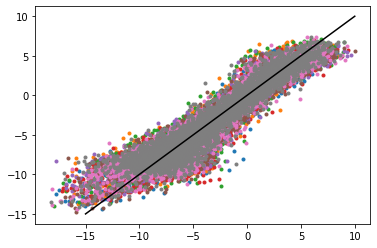

In [63]:
plt.plot(pred.Xcouple, pred.Xpred, '.')
plt.plot([-15, 10], [-15, 10], 'k')

In [64]:
beta10, _ = L96_X.from_dataset(train_loader, val_loader, ds_test, beta=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory /home/pp2681/L96_predictability/lightning_logs/version_25954153/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (49) is smaller than the logging interval Trainer(log_every_n_steps=50

Epoch 0:  41%|████      | 40/98 [00:00<00:00, 64.23it/s, loss=8.62, v_num=2.6e+7, train_loss=6.560, train_MSE=6.690, train_S=-.0132, train_F=-.0586]
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 70.03it/s, loss=3.38, v_num=2.6e+7, train_loss=3.120, train_MSE=3.250, train_S=-.0126, train_F=-.0105, val_loss=5.150, val_MSE=5.260, val_S=-.0113, val_F=-.0455]
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 99.10it/s, loss=2.93, v_num=2.6e+7, train_loss=2.880, train_MSE=3.000, train_S=-.0121, train_F=-.008, val_loss=3.170, val_MSE=3.300, val_S=-.0131, val_F=-.0118]  
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 108.85it/s, loss=2.76, v_num=2.6e+7, train_loss=2.730, train_MSE=2.840, train_S=-.0113, train_F=-.00789, val_loss=2.840, val_MSE=2.960, val_S=-.012, val_F=-.00919]
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 100.71it/s, loss=2.67, v_num=2.6e+7, train_loss=2.650,

Epoch 9:  41%|████      | 40/98 [00:00<00:01, 53.81it/s, loss=2.42, v_num=2.6e+7, train_loss=2.380, train_MSE=2.480, train_S=-.00952, train_F=-.0102, val_loss=2.440, val_MSE=2.540, val_S=-.00973, val_F=-.0117] 
Validation: 0it [00:00, ?it/s]
Epoch 10:  41%|████      | 40/98 [00:00<00:00, 89.62it/s, loss=2.39, v_num=2.6e+7, train_loss=2.420, train_MSE=2.520, train_S=-.0098, train_F=-.0104, val_loss=2.400, val_MSE=2.490, val_S=-.00964, val_F=-.0113]  
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 95.68it/s, loss=2.34, v_num=2.6e+7, train_loss=2.380, train_MSE=2.470, train_S=-.00942, train_F=-.00996, val_loss=2.350, val_MSE=2.450, val_S=-.00933, val_F=-.0107]
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 83.21it/s, loss=2.33, v_num=2.6e+7, train_loss=2.340, train_MSE=2.430, train_S=-.00912, train_F=-.0127, val_loss=2.330, val_MSE=2.420, val_S=-.00912, val_F=-.0108] 
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 40

Epoch 17:  41%|████      | 40/98 [00:00<00:00, 79.62it/s, loss=2.23, v_num=2.6e+7, train_loss=2.210, train_MSE=2.290, train_S=-.00817, train_F=-.0107, val_loss=2.280, val_MSE=2.360, val_S=-.00872, val_F=-.0108]
Validation: 0it [00:00, ?it/s]
Epoch 18:  41%|████      | 40/98 [00:00<00:00, 65.47it/s, loss=2.25, v_num=2.6e+7, train_loss=2.230, train_MSE=2.310, train_S=-.00849, train_F=-.0103, val_loss=2.230, val_MSE=2.310, val_S=-.00855, val_F=-.0103] 
Validation: 0it [00:00, ?it/s]
Epoch 19:  41%|████      | 40/98 [00:00<00:00, 63.92it/s, loss=2.2, v_num=2.6e+7, train_loss=2.190, train_MSE=2.270, train_S=-.0083, train_F=-.00923, val_loss=2.240, val_MSE=2.330, val_S=-.00862, val_F=-.0103] 
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:01, 54.36it/s, loss=2.2, v_num=2.6e+7, train_loss=2.160, train_MSE=2.240, train_S=-.00828, train_F=-.0106, val_loss=2.190, val_MSE=2.280, val_S=-.00834, val_F=-.0104] 
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      | 40/9

Epoch 25:  41%|████      | 40/98 [00:00<00:00, 117.24it/s, loss=2.17, v_num=2.6e+7, train_loss=2.140, train_MSE=2.220, train_S=-.00818, train_F=-.00966, val_loss=2.190, val_MSE=2.270, val_S=-.00818, val_F=-.00983]
Validation: 0it [00:00, ?it/s]
Epoch 26:  41%|████      | 40/98 [00:00<00:00, 75.40it/s, loss=2.17, v_num=2.6e+7, train_loss=2.250, train_MSE=2.340, train_S=-.00849, train_F=-.0109, val_loss=2.200, val_MSE=2.280, val_S=-.00836, val_F=-.0127] 
Validation: 0it [00:00, ?it/s]
Epoch 27:  41%|████      | 40/98 [00:00<00:00, 59.96it/s, loss=2.14, v_num=2.6e+7, train_loss=2.150, train_MSE=2.230, train_S=-.00803, train_F=-.011, val_loss=2.150, val_MSE=2.230, val_S=-.00792, val_F=-.0101]  
Validation: 0it [00:00, ?it/s]
Epoch 28:  41%|████      | 40/98 [00:00<00:00, 108.44it/s, loss=2.14, v_num=2.6e+7, train_loss=2.230, train_MSE=2.310, train_S=-.00824, train_F=-.0097, val_loss=2.130, val_MSE=2.210, val_S=-.00799, val_F=-.0103] 
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      

Epoch 33:  41%|████      | 40/98 [00:00<00:00, 117.34it/s, loss=2.13, v_num=2.6e+7, train_loss=2.130, train_MSE=2.210, train_S=-.00808, train_F=-.0101, val_loss=2.110, val_MSE=2.190, val_S=-.00784, val_F=-.00971] 
Validation: 0it [00:00, ?it/s]
Epoch 34:  41%|████      | 40/98 [00:00<00:00, 73.98it/s, loss=2.13, v_num=2.6e+7, train_loss=2.040, train_MSE=2.120, train_S=-.00737, train_F=-.00908, val_loss=2.130, val_MSE=2.210, val_S=-.00795, val_F=-.00911] 
Validation: 0it [00:00, ?it/s]
Epoch 35:  41%|████      | 40/98 [00:00<00:00, 71.11it/s, loss=2.09, v_num=2.6e+7, train_loss=2.080, train_MSE=2.160, train_S=-.00771, train_F=-.00828, val_loss=2.130, val_MSE=2.210, val_S=-.00792, val_F=-.0104]
Validation: 0it [00:00, ?it/s]
Epoch 36:  41%|████      | 40/98 [00:00<00:00, 66.71it/s, loss=2.13, v_num=2.6e+7, train_loss=2.160, train_MSE=2.240, train_S=-.00798, train_F=-.0103, val_loss=2.120, val_MSE=2.200, val_S=-.00784, val_F=-.00997] 
Validation: 0it [00:00, ?it/s]
Epoch 37:  41%|████    

Epoch 41:  41%|████      | 40/98 [00:00<00:00, 117.29it/s, loss=2.11, v_num=2.6e+7, train_loss=2.120, train_MSE=2.200, train_S=-.00754, train_F=-.00952, val_loss=2.070, val_MSE=2.150, val_S=-.00759, val_F=-.00972]
Validation: 0it [00:00, ?it/s]
Epoch 42:  41%|████      | 40/98 [00:00<00:00, 116.25it/s, loss=2.12, v_num=2.6e+7, train_loss=2.140, train_MSE=2.210, train_S=-.00781, train_F=-.0104, val_loss=2.110, val_MSE=2.180, val_S=-.00769, val_F=-.0102]
Validation: 0it [00:00, ?it/s]
Epoch 43:  41%|████      | 40/98 [00:00<00:00, 115.85it/s, loss=2.11, v_num=2.6e+7, train_loss=2.110, train_MSE=2.190, train_S=-.00766, train_F=-.0115, val_loss=2.100, val_MSE=2.180, val_S=-.00768, val_F=-.00962] 
Validation: 0it [00:00, ?it/s]
Epoch 44:  41%|████      | 40/98 [00:00<00:00, 117.03it/s, loss=2.08, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_S=-.00747, train_F=-.0105, val_loss=2.100, val_MSE=2.170, val_S=-.00761, val_F=-.0106]
Validation: 0it [00:00, ?it/s]
Epoch 45:  41%|████     

Epoch 49:  41%|████      | 40/98 [00:00<00:00, 117.46it/s, loss=2.08, v_num=2.6e+7, train_loss=2.070, train_MSE=2.140, train_S=-.00748, train_F=-.012, val_loss=2.120, val_MSE=2.200, val_S=-.00778, val_F=-.00884] 
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:00, 117.18it/s, loss=2.07, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_S=-.00753, train_F=-.00902, val_loss=2.050, val_MSE=2.120, val_S=-.00732, val_F=-.00985]
Validation: 0it [00:00, ?it/s]
Epoch 51:  41%|████      | 40/98 [00:00<00:00, 118.51it/s, loss=2.08, v_num=2.6e+7, train_loss=2.070, train_MSE=2.150, train_S=-.00732, train_F=-.011, val_loss=2.070, val_MSE=2.150, val_S=-.00745, val_F=-.0104]  
Validation: 0it [00:00, ?it/s]
Epoch 52:  41%|████      | 40/98 [00:00<00:00, 117.19it/s, loss=2.08, v_num=2.6e+7, train_loss=2.100, train_MSE=2.170, train_S=-.0076, train_F=-.00798, val_loss=2.050, val_MSE=2.120, val_S=-.00738, val_F=-.00986] 
Validation: 0it [00:00, ?it/s]
Epoch 53:  41%|████   

Epoch 57:  41%|████      | 40/98 [00:00<00:00, 77.46it/s, loss=2.06, v_num=2.6e+7, train_loss=2.040, train_MSE=2.110, train_S=-.00719, train_F=-.00778, val_loss=2.070, val_MSE=2.140, val_S=-.00734, val_F=-.0101]
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 95.55it/s, loss=2.04, v_num=2.6e+7, train_loss=2.090, train_MSE=2.160, train_S=-.00732, train_F=-.0112, val_loss=2.110, val_MSE=2.180, val_S=-.00751, val_F=-.00862] 
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 69.33it/s, loss=2.05, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_S=-.00733, train_F=-.00885, val_loss=2.030, val_MSE=2.100, val_S=-.00714, val_F=-.00945] 
Validation: 0it [00:00, ?it/s]
Epoch 60:  41%|████      | 40/98 [00:00<00:00, 113.39it/s, loss=2.05, v_num=2.6e+7, train_loss=2.060, train_MSE=2.140, train_S=-.00733, train_F=-.00911, val_loss=2.030, val_MSE=2.100, val_S=-.00718, val_F=-.00947]
Validation: 0it [00:00, ?it/s]
Epoch 61:  41%|████    

Epoch 65:  41%|████      | 40/98 [00:00<00:00, 69.64it/s, loss=2.05, v_num=2.6e+7, train_loss=1.990, train_MSE=2.060, train_S=-.00709, train_F=-.00746, val_loss=2.030, val_MSE=2.100, val_S=-.00721, val_F=-.00954]
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 116.05it/s, loss=2.03, v_num=2.6e+7, train_loss=2.110, train_MSE=2.180, train_S=-.00733, train_F=-.00878, val_loss=2.030, val_MSE=2.100, val_S=-.00722, val_F=-.0105]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 107.55it/s, loss=2.06, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_S=-.0075, train_F=-.0118, val_loss=2.010, val_MSE=2.080, val_S=-.00709, val_F=-.00992]  
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 97.71it/s, loss=2.03, v_num=2.6e+7, train_loss=2.010, train_MSE=2.080, train_S=-.00708, train_F=-.00925, val_loss=2.040, val_MSE=2.110, val_S=-.00707, val_F=-.00945] 
Validation: 0it [00:00, ?it/s]
Epoch 69:  41%|████   

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 65.47it/s, loss=2.01, v_num=2.6e+7, train_loss=2.000, train_MSE=2.070, train_S=-.00689, train_F=-.00851, val_loss=1.990, val_MSE=2.060, val_S=-.00692, val_F=-.00938]
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 69.48it/s, loss=2, v_num=2.6e+7, train_loss=2.020, train_MSE=2.090, train_S=-.00697, train_F=-.0102, val_loss=2.000, val_MSE=2.070, val_S=-.00695, val_F=-.00956]   
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 117.02it/s, loss=2.02, v_num=2.6e+7, train_loss=1.990, train_MSE=2.060, train_S=-.00717, train_F=-.0105, val_loss=2.000, val_MSE=2.070, val_S=-.00696, val_F=-.00924] 
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:01, 50.74it/s, loss=2.01, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_S=-.00709, train_F=-.00869, val_loss=1.990, val_MSE=2.060, val_S=-.00692, val_F=-.00922] 
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████    

Epoch 81:  41%|████      | 40/98 [00:00<00:01, 54.55it/s, loss=2.01, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_S=-.00714, train_F=-.00901, val_loss=2.000, val_MSE=2.070, val_S=-.0068, val_F=-.00965] 
Validation: 0it [00:00, ?it/s]
Epoch 82:  41%|████      | 40/98 [00:00<00:00, 113.06it/s, loss=2.01, v_num=2.6e+7, train_loss=2.040, train_MSE=2.110, train_S=-.00698, train_F=-.00807, val_loss=1.990, val_MSE=2.060, val_S=-.00688, val_F=-.00915]
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 73.40it/s, loss=2.01, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_S=-.0071, train_F=-.00955, val_loss=2.010, val_MSE=2.080, val_S=-.00707, val_F=-.00922]  
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:00, 117.02it/s, loss=2.03, v_num=2.6e+7, train_loss=2.000, train_MSE=2.070, train_S=-.00704, train_F=-.00772, val_loss=2.000, val_MSE=2.070, val_S=-.00693, val_F=-.00914]
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████  

Epoch 89:  41%|████      | 40/98 [00:00<00:00, 91.09it/s, loss=2.02, v_num=2.6e+7, train_loss=1.900, train_MSE=1.970, train_S=-.0067, train_F=-.00897, val_loss=1.970, val_MSE=2.040, val_S=-.00679, val_F=-.00924] 
Validation: 0it [00:00, ?it/s]
Epoch 90:  41%|████      | 40/98 [00:00<00:00, 116.99it/s, loss=2.02, v_num=2.6e+7, train_loss=2.000, train_MSE=2.070, train_S=-.00696, train_F=-.00978, val_loss=2.020, val_MSE=2.090, val_S=-.00684, val_F=-.0104]
Validation: 0it [00:00, ?it/s]
Epoch 91:  41%|████      | 40/98 [00:00<00:00, 84.00it/s, loss=1.98, v_num=2.6e+7, train_loss=1.980, train_MSE=2.050, train_S=-.00662, train_F=-.0102, val_loss=2.010, val_MSE=2.080, val_S=-.00696, val_F=-.00906] 
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/98 [00:00<00:01, 48.02it/s, loss=1.98, v_num=2.6e+7, train_loss=2.030, train_MSE=2.100, train_S=-.00684, train_F=-.0106, val_loss=1.980, val_MSE=2.050, val_S=-.00685, val_F=-.00927] 
Validation: 0it [00:00, ?it/s]
Epoch 93:  41%|████     

Epoch 97:  41%|████      | 40/98 [00:00<00:00, 115.25it/s, loss=2, v_num=2.6e+7, train_loss=2.000, train_MSE=2.070, train_S=-.0067, train_F=-.00977, val_loss=1.970, val_MSE=2.030, val_S=-.00666, val_F=-.00926]    
Validation: 0it [00:00, ?it/s]
Epoch 98:  41%|████      | 40/98 [00:00<00:00, 117.48it/s, loss=1.97, v_num=2.6e+7, train_loss=1.940, train_MSE=2.000, train_S=-.00656, train_F=-.00842, val_loss=1.970, val_MSE=2.040, val_S=-.0068, val_F=-.00911]
Validation: 0it [00:00, ?it/s]
Epoch 99:  41%|████      | 40/98 [00:00<00:00, 117.44it/s, loss=1.99, v_num=2.6e+7, train_loss=1.900, train_MSE=1.960, train_S=-.00647, train_F=-.00763, val_loss=1.990, val_MSE=2.060, val_S=-.00682, val_F=-.00941]
Validation: 0it [00:00, ?it/s]
Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 107.00it/s, loss=1.97, v_num=2.6e+7, train_loss=1.910, train_MSE=1.980, train_S=-.00665, train_F=-.00886, val_loss=1.960, val_MSE=2.020, val_S=-.00664, val_F=-.00926]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 106.55it/s, loss=1.97, v_num=2.6e+7, train_loss=1.910, train_MSE=1.980, train_S=-.00665, train_F=-.00886, val_loss=1.960, val_MSE=2.020, val_S=-.00664, val_F=-.00926]


In [65]:
gamma10, _ = L96_X.from_dataset(train_loader, val_loader, ds_test, gamma=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Epoch 0:  41%|████      | 40/98 [00:00<00:00, 115.51it/s, loss=6.74, v_num=2.6e+7, train_loss=5.690, train_MSE=6.380, train_S=-.0109, train_F=-.0692]
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:01, 46.71it/s, loss=3.44, v_num=2.6e+7, train_loss=3.210, train_MSE=3.420, train_S=-.0127, train_F=-.0207, val_loss=4.770, val_MSE=5.360, val_S=-.0118, val_F=-.0591] 
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 94.00it/s, loss=2.95, v_num=2.6e+7, train_loss=2.900, train_MSE=3.050, train_S=-.0118, train_F=-.0149, val_loss=3.190, val_MSE=3.370, val_S=-.0126, val_F=-.0181]
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:01, 49.61it/s, loss=2.81, v_num=2.6e+7, train_loss=2.820, train_MSE=2.950, train_S=-.0114, train_F=-.0131, val_loss=2.890, val_MSE=3.030, val_S=-.0118, val_F=-.0144] 
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 111.50it/s, loss=2.66, v_num=2.6e+7, train_loss=2.690,

Epoch 9:  41%|████      | 40/98 [00:00<00:00, 116.99it/s, loss=2.35, v_num=2.6e+7, train_loss=2.250, train_MSE=2.400, train_S=-.00914, train_F=-.0144, val_loss=2.370, val_MSE=2.510, val_S=-.00941, val_F=-.0135]
Validation: 0it [00:00, ?it/s]
Epoch 10:  41%|████      | 40/98 [00:00<00:00, 73.63it/s, loss=2.33, v_num=2.6e+7, train_loss=2.390, train_MSE=2.530, train_S=-.0093, train_F=-.0139, val_loss=2.340, val_MSE=2.470, val_S=-.00933, val_F=-.013]  
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 73.14it/s, loss=2.31, v_num=2.6e+7, train_loss=2.340, train_MSE=2.480, train_S=-.00938, train_F=-.014, val_loss=2.330, val_MSE=2.460, val_S=-.00917, val_F=-.013]  
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:01, 57.24it/s, loss=2.34, v_num=2.6e+7, train_loss=2.470, train_MSE=2.580, train_S=-.0094, train_F=-.0115, val_loss=2.280, val_MSE=2.410, val_S=-.00905, val_F=-.0133] 
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 40/98

Epoch 17:  41%|████      | 40/98 [00:00<00:00, 66.42it/s, loss=2.24, v_num=2.6e+7, train_loss=2.340, train_MSE=2.450, train_S=-.0089, train_F=-.011, val_loss=2.240, val_MSE=2.370, val_S=-.00873, val_F=-.0133]  
Validation: 0it [00:00, ?it/s]
Epoch 18:  41%|████      | 40/98 [00:00<00:00, 83.82it/s, loss=2.18, v_num=2.6e+7, train_loss=2.200, train_MSE=2.330, train_S=-.00849, train_F=-.0135, val_loss=2.230, val_MSE=2.360, val_S=-.00867, val_F=-.0131] 
Validation: 0it [00:00, ?it/s]
Epoch 19:  41%|████      | 40/98 [00:00<00:00, 65.69it/s, loss=2.2, v_num=2.6e+7, train_loss=2.240, train_MSE=2.400, train_S=-.00877, train_F=-.0155, val_loss=2.170, val_MSE=2.300, val_S=-.00832, val_F=-.0129]  
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 83.17it/s, loss=2.18, v_num=2.6e+7, train_loss=2.130, train_MSE=2.270, train_S=-.00829, train_F=-.0133, val_loss=2.170, val_MSE=2.300, val_S=-.00827, val_F=-.013]
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      | 40/9

Epoch 25:  41%|████      | 40/98 [00:00<00:00, 113.98it/s, loss=2.12, v_num=2.6e+7, train_loss=2.080, train_MSE=2.220, train_S=-.00786, train_F=-.0135, val_loss=2.110, val_MSE=2.240, val_S=-.00801, val_F=-.0129]
Validation: 0it [00:00, ?it/s]
Epoch 26:  41%|████      | 40/98 [00:00<00:01, 50.92it/s, loss=2.13, v_num=2.6e+7, train_loss=2.090, train_MSE=2.200, train_S=-.00773, train_F=-.0108, val_loss=2.110, val_MSE=2.240, val_S=-.00798, val_F=-.0128] 
Validation: 0it [00:00, ?it/s]
Epoch 27:  41%|████      | 40/98 [00:00<00:00, 89.76it/s, loss=2.11, v_num=2.6e+7, train_loss=2.120, train_MSE=2.220, train_S=-.00786, train_F=-.00969, val_loss=2.100, val_MSE=2.230, val_S=-.00789, val_F=-.0131]
Validation: 0it [00:00, ?it/s]
Epoch 28:  41%|████      | 40/98 [00:00<00:00, 62.16it/s, loss=2.14, v_num=2.6e+7, train_loss=2.140, train_MSE=2.260, train_S=-.00803, train_F=-.0122, val_loss=2.100, val_MSE=2.240, val_S=-.00789, val_F=-.0133] 
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      | 4

Epoch 33:  41%|████      | 40/98 [00:00<00:00, 66.04it/s, loss=2.1, v_num=2.6e+7, train_loss=2.030, train_MSE=2.160, train_S=-.00771, train_F=-.0128, val_loss=2.100, val_MSE=2.230, val_S=-.00777, val_F=-.0128] 
Validation: 0it [00:00, ?it/s]
Epoch 34:  41%|████      | 40/98 [00:00<00:00, 71.08it/s, loss=2.11, v_num=2.6e+7, train_loss=2.070, train_MSE=2.210, train_S=-.0079, train_F=-.0133, val_loss=2.090, val_MSE=2.210, val_S=-.00783, val_F=-.0128] 
Validation: 0it [00:00, ?it/s]
Epoch 35:  41%|████      | 40/98 [00:00<00:01, 44.52it/s, loss=2.09, v_num=2.6e+7, train_loss=2.060, train_MSE=2.180, train_S=-.0076, train_F=-.0121, val_loss=2.080, val_MSE=2.210, val_S=-.00782, val_F=-.013]
Validation: 0it [00:00, ?it/s]
Epoch 36:  41%|████      | 40/98 [00:00<00:00, 87.71it/s, loss=2.11, v_num=2.6e+7, train_loss=2.100, train_MSE=2.230, train_S=-.00781, train_F=-.0136, val_loss=2.060, val_MSE=2.180, val_S=-.0076, val_F=-.0129]
Validation: 0it [00:00, ?it/s]
Epoch 37:  41%|████      | 40/98 [0

Epoch 41:  41%|████      | 40/98 [00:00<00:00, 59.18it/s, loss=2.06, v_num=2.6e+7, train_loss=2.110, train_MSE=2.230, train_S=-.00764, train_F=-.0125, val_loss=2.040, val_MSE=2.170, val_S=-.00758, val_F=-.0129]
Validation: 0it [00:00, ?it/s]
Epoch 42:  41%|████      | 40/98 [00:00<00:00, 71.33it/s, loss=2.06, v_num=2.6e+7, train_loss=2.180, train_MSE=2.320, train_S=-.00827, train_F=-.0137, val_loss=2.030, val_MSE=2.150, val_S=-.00749, val_F=-.0125]
Validation: 0it [00:00, ?it/s]
Epoch 43:  41%|████      | 40/98 [00:00<00:00, 102.62it/s, loss=2.07, v_num=2.6e+7, train_loss=2.100, train_MSE=2.230, train_S=-.00764, train_F=-.0131, val_loss=2.040, val_MSE=2.170, val_S=-.00753, val_F=-.0133]
Validation: 0it [00:00, ?it/s]
Epoch 44:  41%|████      | 40/98 [00:00<00:00, 107.77it/s, loss=2.05, v_num=2.6e+7, train_loss=2.020, train_MSE=2.150, train_S=-.00763, train_F=-.0134, val_loss=2.040, val_MSE=2.170, val_S=-.00747, val_F=-.0128]
Validation: 0it [00:00, ?it/s]
Epoch 45:  41%|████      | 40/

Epoch 49:  41%|████      | 40/98 [00:00<00:00, 75.73it/s, loss=2.04, v_num=2.6e+7, train_loss=2.160, train_MSE=2.290, train_S=-.00765, train_F=-.0129, val_loss=2.020, val_MSE=2.140, val_S=-.00744, val_F=-.0123]
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:01, 57.40it/s, loss=2.04, v_num=2.6e+7, train_loss=1.960, train_MSE=2.090, train_S=-.00711, train_F=-.0132, val_loss=2.030, val_MSE=2.160, val_S=-.00741, val_F=-.0128] 
Validation: 0it [00:00, ?it/s]
Epoch 51:  41%|████      | 40/98 [00:00<00:00, 84.53it/s, loss=2.02, v_num=2.6e+7, train_loss=1.970, train_MSE=2.100, train_S=-.00734, train_F=-.0127, val_loss=2.030, val_MSE=2.160, val_S=-.00743, val_F=-.0124]
Validation: 0it [00:00, ?it/s]
Epoch 52:  41%|████      | 40/98 [00:00<00:00, 77.14it/s, loss=2.03, v_num=2.6e+7, train_loss=2.060, train_MSE=2.190, train_S=-.00763, train_F=-.0135, val_loss=2.020, val_MSE=2.140, val_S=-.00745, val_F=-.0128] 
Validation: 0it [00:00, ?it/s]
Epoch 53:  41%|████      | 40/

Epoch 57:  41%|████      | 40/98 [00:00<00:00, 74.35it/s, loss=2, v_num=2.6e+7, train_loss=1.960, train_MSE=2.100, train_S=-.00731, train_F=-.0138, val_loss=1.980, val_MSE=2.110, val_S=-.00716, val_F=-.0124]    
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 88.13it/s, loss=2.01, v_num=2.6e+7, train_loss=2.030, train_MSE=2.150, train_S=-.00751, train_F=-.0128, val_loss=2.000, val_MSE=2.140, val_S=-.00728, val_F=-.0132]
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 65.40it/s, loss=1.98, v_num=2.6e+7, train_loss=1.940, train_MSE=2.070, train_S=-.00705, train_F=-.0127, val_loss=2.010, val_MSE=2.130, val_S=-.00734, val_F=-.0126]
Validation: 0it [00:00, ?it/s]
Epoch 60:  41%|████      | 40/98 [00:00<00:00, 58.39it/s, loss=2, v_num=2.6e+7, train_loss=1.960, train_MSE=2.090, train_S=-.00722, train_F=-.0134, val_loss=1.980, val_MSE=2.110, val_S=-.00713, val_F=-.0125]   
Validation: 0it [00:00, ?it/s]
Epoch 61:  41%|████      | 40/9

Epoch 65:  41%|████      | 40/98 [00:00<00:00, 116.45it/s, loss=1.98, v_num=2.6e+7, train_loss=1.890, train_MSE=2.010, train_S=-.00688, train_F=-.0122, val_loss=1.980, val_MSE=2.110, val_S=-.00711, val_F=-.0132]
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 74.72it/s, loss=2.01, v_num=2.6e+7, train_loss=1.940, train_MSE=2.070, train_S=-.00692, train_F=-.013, val_loss=2.010, val_MSE=2.130, val_S=-.0072, val_F=-.0122] 
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 77.76it/s, loss=1.99, v_num=2.6e+7, train_loss=1.920, train_MSE=2.020, train_S=-.00678, train_F=-.0105, val_loss=1.970, val_MSE=2.100, val_S=-.00713, val_F=-.0128] 
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:01, 43.92it/s, loss=2.02, v_num=2.6e+7, train_loss=2.100, train_MSE=2.220, train_S=-.00751, train_F=-.0126, val_loss=1.980, val_MSE=2.100, val_S=-.00697, val_F=-.0125]
Validation: 0it [00:00, ?it/s]
Epoch 69:  41%|████      | 40/9

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 95.46it/s, loss=1.97, v_num=2.6e+7, train_loss=2.000, train_MSE=2.130, train_S=-.00697, train_F=-.0134, val_loss=2.000, val_MSE=2.130, val_S=-.00727, val_F=-.0127]
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 115.17it/s, loss=2, v_num=2.6e+7, train_loss=1.940, train_MSE=2.070, train_S=-.00703, train_F=-.0127, val_loss=1.960, val_MSE=2.090, val_S=-.00699, val_F=-.0127]   
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 74.12it/s, loss=1.98, v_num=2.6e+7, train_loss=2.000, train_MSE=2.140, train_S=-.00745, train_F=-.0139, val_loss=1.970, val_MSE=2.100, val_S=-.00709, val_F=-.0129] 
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 77.64it/s, loss=1.99, v_num=2.6e+7, train_loss=2.010, train_MSE=2.130, train_S=-.00698, train_F=-.0123, val_loss=1.970, val_MSE=2.090, val_S=-.00703, val_F=-.0123]
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████      | 40/

Epoch 81:  41%|████      | 40/98 [00:00<00:00, 96.78it/s, loss=1.96, v_num=2.6e+7, train_loss=1.980, train_MSE=2.090, train_S=-.00678, train_F=-.0104, val_loss=1.960, val_MSE=2.080, val_S=-.00689, val_F=-.0124] 
Validation: 0it [00:00, ?it/s]
Epoch 82:  41%|████      | 40/98 [00:00<00:00, 108.07it/s, loss=1.96, v_num=2.6e+7, train_loss=1.960, train_MSE=2.080, train_S=-.00676, train_F=-.0127, val_loss=2.010, val_MSE=2.130, val_S=-.00716, val_F=-.0123]
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 91.60it/s, loss=1.97, v_num=2.6e+7, train_loss=1.980, train_MSE=2.120, train_S=-.00699, train_F=-.0138, val_loss=2.010, val_MSE=2.140, val_S=-.00736, val_F=-.0135]
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:00, 80.07it/s, loss=1.95, v_num=2.6e+7, train_loss=2.000, train_MSE=2.120, train_S=-.0069, train_F=-.0119, val_loss=1.980, val_MSE=2.100, val_S=-.00695, val_F=-.0122] 
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████      | 40/

Epoch 89:  41%|████      | 40/98 [00:00<00:00, 117.06it/s, loss=1.95, v_num=2.6e+7, train_loss=1.940, train_MSE=2.070, train_S=-.00677, train_F=-.0136, val_loss=1.970, val_MSE=2.090, val_S=-.00691, val_F=-.012]
Validation: 0it [00:00, ?it/s]
Epoch 90:  41%|████      | 40/98 [00:00<00:00, 116.72it/s, loss=1.96, v_num=2.6e+7, train_loss=1.920, train_MSE=2.060, train_S=-.00681, train_F=-.0134, val_loss=1.930, val_MSE=2.060, val_S=-.00668, val_F=-.0125] 
Validation: 0it [00:00, ?it/s]
Epoch 91:  41%|████      | 40/98 [00:00<00:00, 117.02it/s, loss=1.96, v_num=2.6e+7, train_loss=1.990, train_MSE=2.110, train_S=-.00705, train_F=-.0117, val_loss=1.950, val_MSE=2.080, val_S=-.00681, val_F=-.0123]
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/98 [00:00<00:00, 116.63it/s, loss=1.96, v_num=2.6e+7, train_loss=1.940, train_MSE=2.080, train_S=-.00676, train_F=-.0145, val_loss=2.000, val_MSE=2.130, val_S=-.00723, val_F=-.0126]
Validation: 0it [00:00, ?it/s]
Epoch 93:  41%|████      | 4

Epoch 97:  41%|████      | 40/98 [00:00<00:00, 62.96it/s, loss=1.95, v_num=2.6e+7, train_loss=1.880, train_MSE=1.990, train_S=-.00654, train_F=-.0119, val_loss=1.930, val_MSE=2.060, val_S=-.00671, val_F=-.0126]
Validation: 0it [00:00, ?it/s]
Epoch 98:  41%|████      | 40/98 [00:00<00:00, 117.25it/s, loss=1.97, v_num=2.6e+7, train_loss=1.880, train_MSE=2.010, train_S=-.00674, train_F=-.0124, val_loss=1.940, val_MSE=2.060, val_S=-.00676, val_F=-.0127]
Validation: 0it [00:00, ?it/s]
Epoch 99:  41%|████      | 40/98 [00:00<00:00, 104.69it/s, loss=1.95, v_num=2.6e+7, train_loss=1.940, train_MSE=2.050, train_S=-.00698, train_F=-.0111, val_loss=1.980, val_MSE=2.100, val_S=-.00698, val_F=-.0122]
Validation: 0it [00:00, ?it/s]
Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 121.81it/s, loss=1.93, v_num=2.6e+7, train_loss=1.990, train_MSE=2.110, train_S=-.00692, train_F=-.0125, val_loss=1.940, val_MSE=2.070, val_S=-.00675, val_F=-.0123]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 121.20it/s, loss=1.93, v_num=2.6e+7, train_loss=1.990, train_MSE=2.110, train_S=-.00692, train_F=-.0125, val_loss=1.940, val_MSE=2.070, val_S=-.00675, val_F=-.0123]


In [79]:
coarse_models = ['coarse', 'online', 'mse', 'beta10', 'gamma10']
all_models = coarse_models + ['ref']

In [80]:
preds = []
for ens in range(500):
    print(ens, end='\r')
    pred = xr.Dataset()
    ref.t = 0
    for model in coarse_models:
        eval(model).init(ref)
    for model in all_models:
        pred[model] = eval(model).run(700)['X']
    preds.append(pred)
preds = xr.concat(preds, dim='ens')

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version

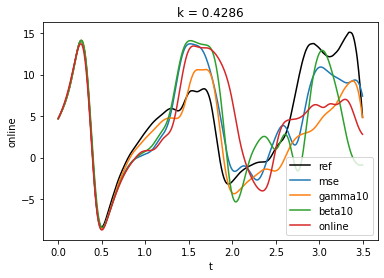

In [81]:
for model in ['ref', 'mse', 'gamma10', 'beta10', 'online']:
    color = 'k' if model=='ref' else None
    preds[model].isel(k=3, ens=43).plot(label=model, color=color)
plt.legend()

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py

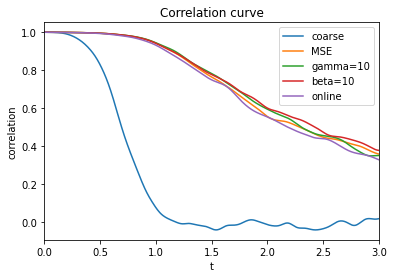

In [87]:
for model, label in zip(
    ['coarse', 'mse', 'gamma10', 'beta10', 'online'],
    ['coarse', 'MSE', 'gamma=10', 'beta=10', 'online']
    ):
    xr.corr(preds['ref'], preds[model], ['k', 'ens']).plot(label=label)
plt.legend()
plt.ylabel('correlation')
plt.title('Correlation curve')
plt.xlim([0,3])
plt.savefig('correlation_all.pdf')